# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [126]:
#prototype proof of concept 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "New York City"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.48, 'feels_like': 60.33, 'temp_min': 61, 'temp_max': 64.99, 'pressure': 1012, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 250}, 'clouds': {'all': 1}, 'dt': 1619911758, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1619862853, 'sunset': 1619913106}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}

In [127]:
lon = weather_json["coord"]["lon"]
lat = weather_json["coord"]["lat"]
temp = weather_json["main"]["temp"]
humidity = weather_json["main"]["humidity"]
cloudiness = weather_json["clouds"]["all"]
wind_speed = weather_json["wind"]["speed"]
name = weather_json["name"]
print(f"The temperature is currently {temp}F. in {name}.")
print(f"The barometer is currently at {humidity}% in {name}.")
print(f"There is {cloudiness}% cloud cover currently in {name}.")
print(f"The wind is currently blowing at {wind_speed} mph in {name}.")
print(f"The latitude of {name} is {lat}.")
print(f"The longitude of {name} is {lon}.")

The temperature is currently 63.48F. in New York.
The barometer is currently at 17% in New York.
There is 1% cloud cover currently in New York.
The wind is currently blowing at 5.75 mph in New York.
The latitude of New York is 40.7143.
The longitude of New York is -74.006.


## Generate Cities List

In [128]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [129]:
pprint(cities)

['punta arenas',
 'rikitea',
 'bagdarin',
 'illoqqortoormiut',
 'burica',
 'port alfred',
 'netanya',
 'krasnyy chikoy',
 'hobart',
 'bredasdorp',
 'cape town',
 'half moon bay',
 'atuona',
 'mayo',
 'yukamenskoye',
 'cherskiy',
 'mullaitivu',
 'rio gallegos',
 'ati',
 'lima',
 'ushuaia',
 'bethel',
 'viedma',
 'norman wells',
 'mataura',
 'cayenne',
 'hilo',
 'tessalit',
 'santa isabel',
 'montrose',
 'georgetown',
 'new norfolk',
 'fairlie',
 'barrow',
 'bristol',
 'sibolga',
 'qaanaaq',
 'bengkulu',
 'terney',
 'ranong',
 'vaini',
 'albany',
 'kapaa',
 'muravlenko',
 'burnie',
 'palmer',
 'soc trang',
 'saint-pierre',
 'saint-francois',
 'swiecie',
 'bam',
 'attawapiskat',
 'jiroft',
 'whitehorse',
 'hermanus',
 'coos bay',
 'haines junction',
 'belushya guba',
 'bluff',
 'huarmey',
 'tamorong',
 'clyde river',
 'baghdad',
 'katsuura',
 'maha sarakham',
 'balimo',
 'yellowknife',
 'babanusah',
 'kargil',
 'fortuna',
 'sentyabrskiy',
 'umzimvubu',
 'beatrice',
 'luanda',
 'mahebourg'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
#     query_url = url + "appid=" + weather_api_key + "&q=" + city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|punta arenas
Processing record 2|rikitea
Processing record 3|bagdarin
City not found. skipping.
City not found. skipping.
Processing record 4|port alfred
Processing record 5|netanya
Processing record 6|krasnyy chikoy
Processing record 7|hobart
Processing record 8|bredasdorp
Processing record 9|cape town
Processing record 10|half moon bay
Processing record 11|atuona
Processing record 12|mayo
Processing record 13|yukamenskoye
Processing record 14|cherskiy
City not found. skipping.
Processing record 15|rio gallegos
Processing record 16|ati
Processing record 17|lima
Processing record 18|ushuaia
Processing record 19|bethel
Processing record 20|viedma
Processing record 21|norman wells
Processing record 22|mataura
Processing record 23|cayenne
Processing record 24|hilo
Processing record 25|tessalit
Processing record 26|santa isabel
Processing record 27|montrose
Processing record 28|georgetown
Processing record 29|new norfolk
Processing record 30|fairlie
Processing record 31

Processing record 245|dakoro
Processing record 246|port elizabeth
Processing record 247|kaltenkirchen
Processing record 248|katangli
Processing record 249|forestville
Processing record 250|chengde
Processing record 251|talnakh
Processing record 252|okha
Processing record 253|nokaneng
Processing record 254|nikolskoye
Processing record 255|karratha
Processing record 256|makakilo city
Processing record 257|kargasok
Processing record 258|balkhash
Processing record 259|taksimo
Processing record 260|high rock
City not found. skipping.
Processing record 261|carnarvon
Processing record 262|manokwari
Processing record 263|beni
Processing record 264|berezniki
Processing record 265|port lincoln
Processing record 266|paita
Processing record 267|sioux lookout
Processing record 268|avera
Processing record 269|sao joao da barra
Processing record 270|cabo san lucas
Processing record 271|olafsvik
Processing record 272|tezu
Processing record 273|hobyo
Processing record 274|lodja
Processing record 275|sa

Processing record 492|isangel
Processing record 493|balabac
Processing record 494|la ronge
Processing record 495|saint-augustin
Processing record 496|escarcega
Processing record 497|pizarro
City not found. skipping.
Processing record 498|fartura
Processing record 499|novorudnyy
Processing record 500|skarnes
Processing record 501|high level
Processing record 502|strezhevoy
Processing record 503|sujiatun
Processing record 504|lillehammer
Processing record 505|delta del tigre
Processing record 506|vidim
Processing record 507|jinchang
Processing record 508|khatanga
Processing record 509|the valley
Processing record 510|davila
Processing record 511|kushmurun
Processing record 512|peniche
Processing record 513|terra santa
Processing record 514|kristinehamn
Processing record 515|nawa
Processing record 516|shushenskoye
Processing record 517|abha
Processing record 518|santa cruz de tenerife
Processing record 519|angoram
Processing record 520|santa maria
Processing record 521|riyadh
Processing r

In [131]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.2696, 'lon': 31.1511},
 'dt': 1619911748,
 'id': 362973,
 'main': {'feels_like': 79.05,
          'humidity': 22,
          'pressure': 1015,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Abnūb',
 'sys': {'country': 'EG',
         'id': 2510,
         'sunrise': 1619925342,
         'sunset': 1619972934,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 12.66}}


In [132]:
city_data_df = pd.DataFrame(
                {'City':city_name,
                 'Latitude': lat,
                 'Longitude': lng,
                 'Temperature (max)': max_temp,
                 'Humidity': humidity,
                 'Cloudiness': cloudiness,
                 'Wind Speed': wind_speed,
                 'Country': country,
                 'Date': date})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [134]:
#Export the city data into a .csv.
city_data_df.to_csv("../output_data_file.csv", index = False)

In [135]:
#Display the DataFrame
city_data_df.head()

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.00,87,40,4.61,CL,1619911538
1,Rikitea,-23.1203,-134.9692,75.60,80,91,7.45,PF,1619911648
2,Bagdarin,54.4333,113.6000,35.31,77,37,4.54,RU,1619911703
3,Port Alfred,-33.5906,26.8910,60.76,66,0,5.17,ZA,1619911646
4,Netanya,32.3329,34.8599,66.20,55,0,3.44,IL,1619912006


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [136]:
city_data_df.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,21.300460,15.746387,61.257945,68.416235,53.457686,7.439879,1.619912e+09
std,33.470659,91.268500,18.746776,23.219007,37.681503,5.344077,1.795863e+02
min,-54.800000,-179.166700,12.790000,1.000000,0.000000,0.830000,1.619911e+09
25%,-4.626000,-65.562100,46.400000,55.000000,20.000000,3.440000,1.619912e+09
50%,27.916700,20.971400,64.400000,74.000000,57.000000,6.110000,1.619912e+09
75%,49.764700,98.707000,77.115000,86.500000,90.000000,9.875000,1.619912e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,39.120000,1.619912e+09


In [137]:
#  Get the indices of cities that have humidity over 100%.
#Skipped it since there's no humidity over 100%

In [138]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#there are no cities that have over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [139]:
#Converting Date for title of plot
timestamp = city_data_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

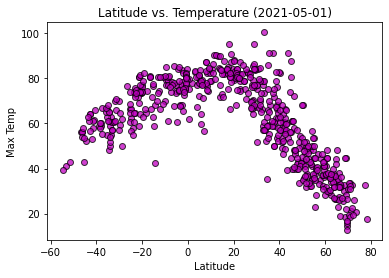

In [140]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature (max)'], marker="o", facecolors="m", edgecolors="black",
            alpha=0.75)

plt.title(f"Latitude vs. Temperature ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data/latitude_vs_temp.png", bbox_inches="tight")

plt.show()

In [141]:
#Summary Analysis
#The Latitude vs Temperature scatter plot is showing that there is a high temperature for those cities that are located near the equator.
#But as you move away from the equator the temperature begins to decrease. 

## Latitude vs. Humidity Plot

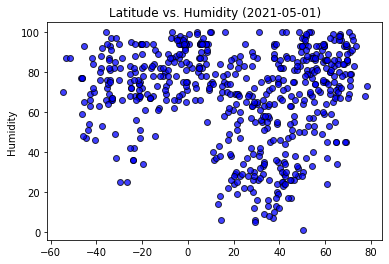

In [142]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

plt.title(f"Latitude vs. Humidity ({shortened_timestamp})")
plt.ylabel("Humidity")
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")

plt.show()

In [143]:
#Summary Analysis
#The Latitude vs. Humidity scatter plot shown above shows that humidity is distributed fairly throughout the plot. Which means humidity is similar in cities that are both close and far from the equator.

## Latitude vs. Cloudiness Plot

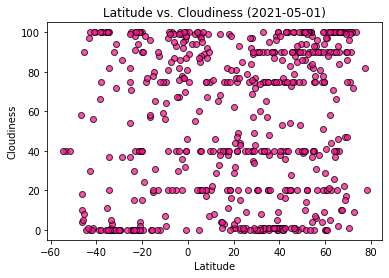

In [144]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o", facecolors="deeppink", edgecolors="black",
            alpha=0.75)

plt.title(f"Latitude vs. Cloudiness ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")

plt.show()

In [145]:
#Summary Analysis
#The Latitude vs. Cloudiness scatter is showing the relation that exists between cloudiness and latitude. From the plot above the data is showing that there is an evenly distributed data which means that there is no difference between cloudiness when cities are located far from the equator or when they are located close to the equator.

## Latitude vs. Wind Speed Plot

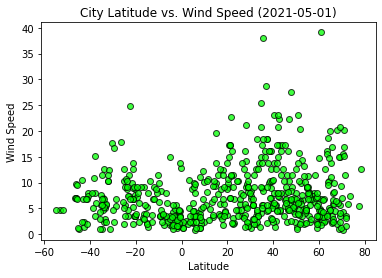

In [146]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o", facecolors="lime", edgecolors="black",
            alpha=0.75)

plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/latitude_vs_windspeed.png", bbox_inches="tight")

plt.show()

In [147]:
#Summary Analysis
#The Latitude vs. Wind Speed Plot shown above is showing the relationship between wind speed (mph), and latitude. According to the scatter plot there is lower wind speed when the cities are closer to the equator however the wind speed increase for the cities farther from the equator.

## Linear Regression

In [148]:
n_hemi = city_data_df.loc[city_data_df['Latitude'] > 0]
n_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
2,Bagdarin,54.4333,113.6000,35.31,77,37,4.54,RU,1619911703
4,Netanya,32.3329,34.8599,66.20,55,0,3.44,IL,1619912006
5,Krasnyy Chikoy,50.3643,108.7512,43.47,86,100,1.41,RU,1619912006
9,Half Moon Bay,37.4636,-122.4286,60.80,87,90,18.41,US,1619911694
11,Mayo,38.8876,-76.5119,66.20,20,1,5.75,US,1619911946
...,...,...,...,...,...,...,...,...,...
572,Capaccio Paestum,40.4244,15.0809,63.00,86,98,5.99,IT,1619912135
574,Kutum,14.2000,24.6667,76.96,18,68,10.27,SD,1619912136
575,Smithers,54.7804,-127.1743,53.60,40,40,9.22,CA,1619911795
577,Vostok,46.4856,135.8833,40.77,58,79,8.19,RU,1619912137


In [149]:
s_hemi = city_data_df.loc[city_data_df['Latitude'] < 0]
s_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.00,87,40,4.61,CL,1619911538
1,Rikitea,-23.1203,-134.9692,75.60,80,91,7.45,PF,1619911648
3,Port Alfred,-33.5906,26.8910,60.76,66,0,5.17,ZA,1619911646
6,Hobart,-42.8794,147.3294,64.00,63,0,6.91,AU,1619911453
7,Bredasdorp,-34.5322,20.0403,48.20,87,82,4.61,ZA,1619911646
...,...,...,...,...,...,...,...,...,...
547,Macatuba,-22.5022,-48.7114,73.40,56,0,6.91,BR,1619912129
554,Nhulunbuy,-12.2333,136.7667,80.60,78,75,6.91,AU,1619911946
557,Antofagasta,-23.6500,-70.4000,60.80,82,0,10.36,CL,1619912106
573,Campos Belos,-13.0367,-46.7717,73.60,61,90,3.76,BR,1619912136


In [150]:
n_hemi.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02
mean,39.730584,7.924079,58.228741,65.190123,54.997531,8.029827,1.619912e+09
std,19.592141,88.113067,20.695039,25.151637,36.875795,5.761597,1.687342e+02
min,0.452500,-179.166700,12.790000,1.000000,0.000000,0.830000,1.619911e+09
25%,24.687700,-74.364600,39.990000,46.000000,20.000000,3.600000,1.619912e+09
50%,40.598200,15.947700,59.000000,71.000000,62.000000,6.710000,1.619912e+09
75%,55.630500,80.857200,78.530000,86.000000,90.000000,10.360000,1.619912e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,39.120000,1.619912e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8716635761729769


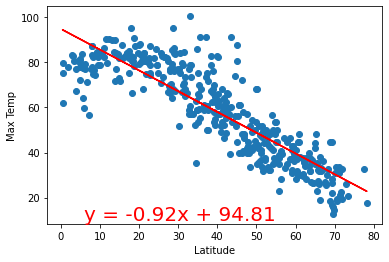

In [151]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7484065077606146


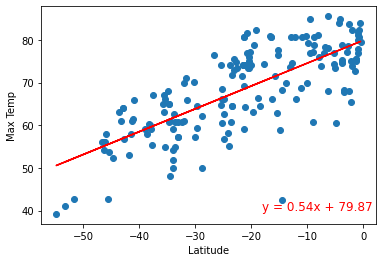

In [152]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1388155977734968


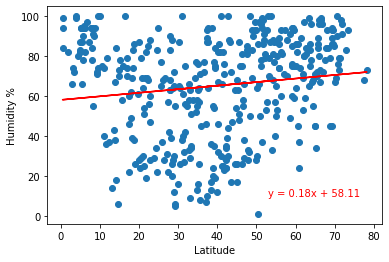

In [153]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2722043506426909


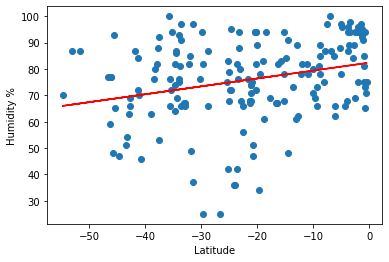

In [154]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14640772073140795


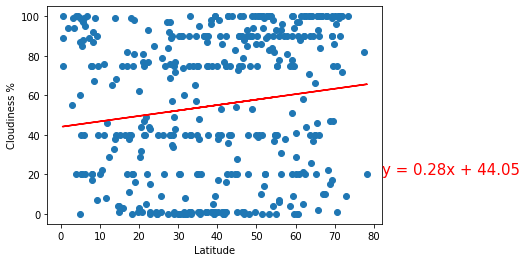

In [155]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2790613832650671


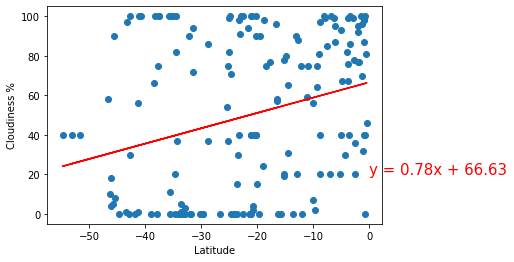

In [156]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0722384685515388


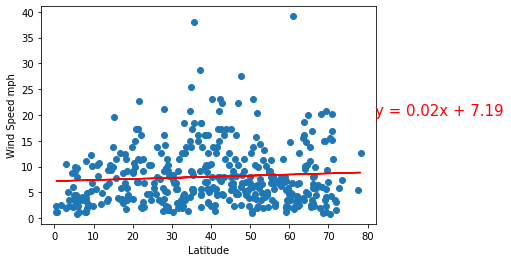

In [157]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.193058520995785


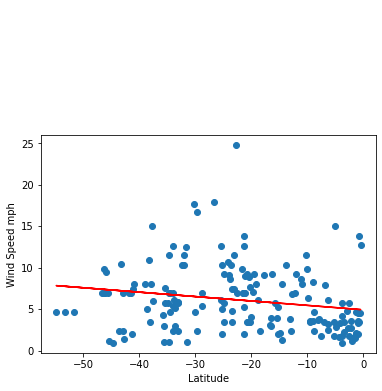

In [158]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()